# **FAR-RIGHT RALLIES AND COUNTERPROTEST AS RESISTANCE: CLAIMING THE STREET**

<img src="./img/rome-riots.jpg" alt="Rome Riots" width="950" height="700">

## 1. CONTEXT AND BACKGROUND

The creation of hatred discourses is seen in reviving an authoritative body: from far-right movements to micro-political parties and parliamentary representation. Ideas such as the rejection of immigration and the non-recognition of minorities are put into play, drawing a social polarisation that separates the multitude from external danger.
The politics of the far-right recruit and actively engage in the public space for diagnosing, packaging, and circulating their discourse and power by fostering mechanisms of watchful control and marginalization. Analysing the protest’s behaviour means calling for a different power-in-the-mass formation.
Far-right politics is a good example of this through its practice of depoliticization, demonization and neutralization of certain groups to become the bare life, people without political subjectivity. These groups, stripped of rights, are rendered vulnerable to symbolic and physical violence. Rallies, marches, and nationalist symbols, help to activate supporters but do so with frames of exclusion and superiority, as nationalism rejects multiculturalism by retreating into simplified ideological denial. 
The collective action has the power to offer a transformative counterforce, reclaiming plurality, interdependence, and shared humanity. Multitudinous resistance, rooted in vulnerability and assembly, disrupts far-right ideologies, challenging their homogenizing control and reimagining democratic possibilities that prioritize inclusivity and equality over exclusion and domination.

## 2. HYPOTHESES
The core questions chosen to guide this Exploratory Data Analysis compel an analysis on how the motivations and the intensity of far-right protests together with the corresponding responses, generate forms of countermobilization and how the dominance of exclusionary discourse in the public space fosters both symbolic and physical violence, thereby sustaining hierarchical power structures:


1. *Certain protest issues are more likely to trigger counter-mobilization.*  
2. *National and supranational far-right mobilizations are more likely to feature verbal counter-mobilization than local events.*  
3. *Protest forms involving physical violence are more likely when counter-mobilization is “Contentious” compared to “No counter-mobilization".*
4. *Issues related to Islam, immigration, and identity have become pillars of far-right discourse, especially since 2014*
5. *Geographical density: the majority of the far-right protests are concentrated in fewer countries*
6. *Except in specific moments of crisis (for example, between 2012 and 2014), welfare issues do not occupy a central place on the far right's mobilisation agenda*

## 3. DATA COLLECTION

### - Data Source

This dataset comes from the **Far-Right Protest Observatory (FARPO)** — an interactive research platform developed by several European universities and research centers. It tracks and measures far-right protest activities across European countries over the past two decades.  

The data helps researchers understand trends in far-right mobilization, including when and where protests occur, their causes, and how they change over time. It provides valuable insight into the dynamics of far-right movements and their impact on European politics and society.


Overall, the data covers protest events related to far-right organisations, parties and actors in different European countries, documenting aspects such as the date, location, level of the event (local, national or supranational), main issues or demands, presence of physical violence, type of actors involved, and possible forms of counter-mobilisation.

The aim of this database is to offer a comparative and longitudinal view of the dynamics of far-right protest in Europe, allowing for analysis of the intensity, repertoires of action, and evolution of their discourses and strategies.It is important to note that the records are limited to events documented in verifiable sources, so the database may not reflect all mobilisation activities, especially those that do not receive media coverage or occur in poorly documented local contexts.




## 4. LIBRARIES AND DATA

### - LIBRARIES


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


### - DATA

In [42]:
df = pd.read_csv("data/FARPE-data_1.3.csv", encoding='latin-1', low_memory=False)
print("Dataset loaded successfully! Shape:", df.shape)
df.head()

Dataset loaded successfully! Shape: (5067, 57)


,Dataset_ID,Country_code,Country_string,Source_code,Source_string,Event_ID,Year,Month,Day,Place,...,Issue2_string,Issue3,Issue3_string,Issue_other,Event_descr,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,1,1,Austria,2,Party website,42,2017,10,1,Budapest,...,Security,NaN,NaN,NaN,Internation IB action to support Hungarian act...,NaN,NaN,NaN,NaN,NaN
1,2,1,Austria,2,Party website,21,2016,9,2,Murtal,...,National identity and culture,7,Islam,NaN,Putting banners and graffiti in the whole city...,NaN,NaN,NaN,NaN,NaN
2,3,1,Austria,2,Party website,34,2016,3,2,Wiener Neustadt,...,Immigration and multiculturalism,NaN,NaN,NaN,FPÖ demo in Wiener Neustadt,NaN,NaN,NaN,NaN,NaN
3,4,1,Austria,2,Party website,35,2016,4,2,Innsbruck,...,Islam,10,Political opponents,NaN,Demo against accepting 240 male refugees,NaN,NaN,NaN,NaN,NaN
4,5,1,Austria,2,Party website,43,2016,6,2,Brennerpass,...,Security,NaN,NaN,NaN,Demonstration for safe boarders,NaN,NaN,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dataset_ID         5067 non-null   int64  
 1   Country_code       5067 non-null   int64  
 2   Country_string     5067 non-null   object 
 3   Source_code        5067 non-null   object 
 4   Source_string      5067 non-null   object 
 5   Event_ID           5067 non-null   object 
 6   Year               5067 non-null   int64  
 7   Month              5067 non-null   int64  
 8   Day                5067 non-null   int64  
 9   Place              5014 non-null   object 
 10  Event_lev          5067 non-null   object 
 11  Event_lev_string   4961 non-null   object 
 12  NameAct1           5065 non-null   object 
 13  TypeAct1           5067 non-null   object 
 14  TypeAct1_string    5067 non-null   object 
 15  NameAct2           1323 non-null   object 
 16  TypeAct2           1093 

In [44]:
df.describe()

,Dataset_ID,Country_code,Year,Month,Day,TypeAct4,TypeAct5,TypeAct6,TypeAct7,TypeAct8,TypeAct9,Countermob_code
count,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,135.000000,65.000000,24.000000,8.000000,3.000000,1.0,5021.000000
mean,2534.000000,8.165581,2013.481942,6.394119,14.715216,2.318519,2.369231,1.958333,3.000000,3.333333,2.0,5.066919
std,1462.861237,3.445936,2.795261,3.371636,9.100614,1.231743,0.893890,0.954585,1.069045,0.577350,NaN,4.121016
min,1.000000,1.000000,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.0,0.000000
25%,1267.500000,5.000000,2011.000000,3.000000,7.000000,1.500000,2.000000,1.000000,2.000000,3.000000,2.0,1.000000
50%,2534.000000,8.000000,2014.000000,6.000000,15.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.0,9.000000
75%,3800.500000,12.000000,2016.000000,9.000000,23.000000,3.000000,3.000000,2.000000,3.250000,3.500000,2.0,9.000000
max,5067.000000,12.000000,2018.000000,12.000000,31.000000,7.000000,4.000000,5.000000,5.000000,4.000000,2.0,9.000000


## 5. DATA CLEANING

I’ll clean up some columns, remove extra quotes, and create simpler names for analysis:

In [45]:
def clean_col(s):
    return s.astype(str).str.strip(" '\"").replace({'nan': np.nan, 'None': np.nan})

df['countermob'] = clean_col(df['Countermob_string'])
df['issue1'] = clean_col(df['Issue1_string'])
df['event_level'] = clean_col(df['Event_lev_string'])
df['protform'] = clean_col(df['Protform_string'])

df[['countermob','issue1','event_level','protform']].head()

,countermob,issue1,event_level,protform
0,Unknown,Immigration and multiculturalism,Supranational (including EU level),Direct and solidarity actions
1,Unknown,Immigration and multiculturalism,Local (district/town or province/region),Symbolic action
2,Unknown,Political opponents,Local (district/town or province/region),"March, demonstration"
3,Contentious,Immigration and multiculturalism,Local (district/town or province/region),"March, demonstration"
4,Unknown,Immigration and multiculturalism,Supranational (including EU level),"March, demonstration"


## 6. PREPROCESSING - HANDLING MISSING VALUES 

I kept rows that have at least one relevant field (issue, protest form, or counter-mobilization):

In [46]:
df_clean = df[df['countermob'].notna() | df['issue1'].notna() | df['protform'].notna()].copy()
print("Rows before:", len(df), "Rows after cleaning:", len(df_clean))

Rows before: 5067 Rows after cleaning: 5067


## 7. CHECKING FOR DUPLICATES

I looked for any duplicates:

In [47]:
df.duplicated().value_counts()

False    5067
Name: count, dtype: int64

In [48]:
df[(df.duplicated()) == True]

,Dataset_ID,Country_code,Country_string,Source_code,Source_string,Event_ID,Year,Month,Day,Place,...,Event_descr,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,countermob,issue1,event_level,protform


## 8. Looking for Nulls

I checked if there were any nulls on every column:

In [49]:
df.isnull().sum()

Dataset_ID           0
Country_code         0
Country_string       0
Source_code          0
Source_string        0
                  ... 
Unnamed: 56       5066
countermob          16
issue1              12
event_level        106
protform             3
Length: 61, dtype: int64

## 9. RESULTS

##### 1. Certain "protest issues" are more likely to trigger counter-mobilization?


I created a new column to mark if an event had counter-mobilization.
Then, I’ll calculate, for each "protest issue", what proportion of events had counter-mobilization.

In [50]:
df_h1 = df_clean[['issue1','countermob']].copy().dropna(subset=['issue1'])
df_h1['has_counter'] = (~df_h1['countermob'].isna()) & (df_h1['countermob'] != 'No counter-mobilization')

issue_stats = df_h1.groupby('issue1')['has_counter'].agg(['sum','count'])
issue_stats['prop_counter'] = issue_stats['sum'] / issue_stats['count']
issue_stats = issue_stats.sort_values('count', ascending=False)
issue_stats.head(10)

,sum,count,prop_counter
issue1,,,
Anniversaries,443,728,0.608516
Immigration and multiculturalism,523,694,0.753602
Political opponents,450,531,0.847458
National identity and culture,328,486,0.674897
Islam,371,417,0.889688
Welfare,335,370,0.905405
Security,195,235,0.829787
"Industry, agriculture, environment",184,231,0.796537
Economy,123,170,0.723529


##### Visualizing the proportion of events with counter-mobilization by issue

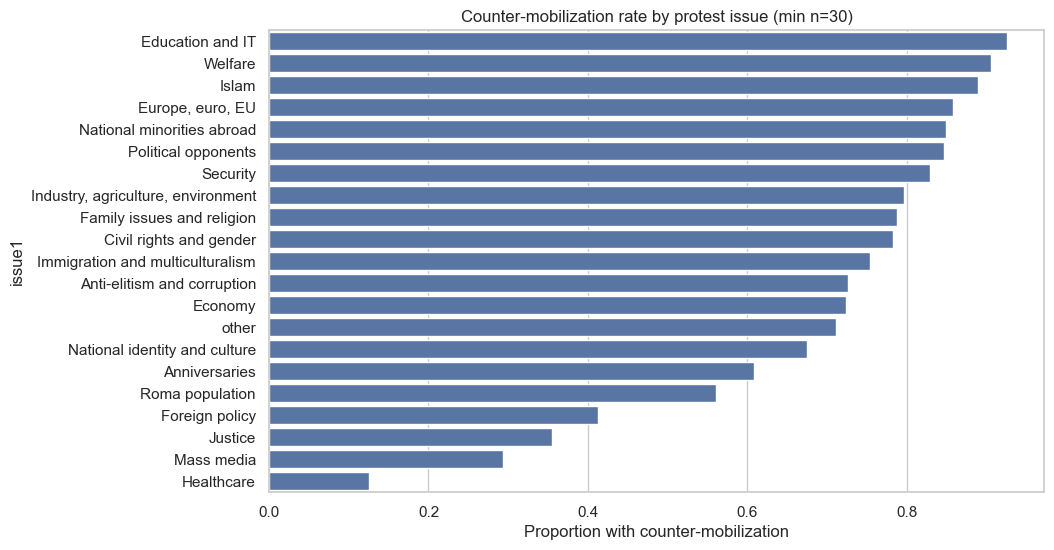

In [51]:
min_n = 30
plot_df = issue_stats[issue_stats['count'] >= min_n].sort_values('prop_counter', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=plot_df['prop_counter'], y=plot_df.index)
plt.xlabel('Proportion with counter-mobilization')
plt.title('Counter-mobilization rate by protest issue (min n=30)')
plt.show()

##### Conclusion
- Issues like **Education**, **Welfare**, and **Islam** show higher shares of counter-mobilization.
- This means such topics tend to **attract more opposition** compared to others.

##### 2. National and supranational mobilizations are more likely to feature verbal counter-mobilization

In [52]:
def map_level(x):
    if isinstance(x, str):
        if 'Local' in x:
            return 'Local'
        if 'National' in x:
            return 'National'
        if 'Supranational' in x or 'EU' in x:
            return 'Supranational'
        if 'Subnational' in x or 'Regional' in x:
            return 'Regional'
    return x

df_h2 = df_clean[['event_level','countermob']].copy().dropna(subset=['event_level'])
df_h2['level_simple'] = df_h2['event_level'].apply(map_level)

# keep only the three levels we want to output for:
keep_levels = ['Local', 'National', 'Supranational']
df_h2 = df_h2[df_h2['level_simple'].isin(keep_levels)].copy()

print("Counts by level_simple (only Local / National / Supranational):")
print(df_h2['level_simple'].value_counts())

Counts by level_simple (only Local / National / Supranational):
level_simple
Local            3268
National         1447
Supranational     199
Name: count, dtype: int64


##### Visualising verbal counter-mobilization rate by event level

               prop_verbal     n
level_simple                    
National          0.080166  1447
Local             0.039474  3268
Supranational     0.035176   199


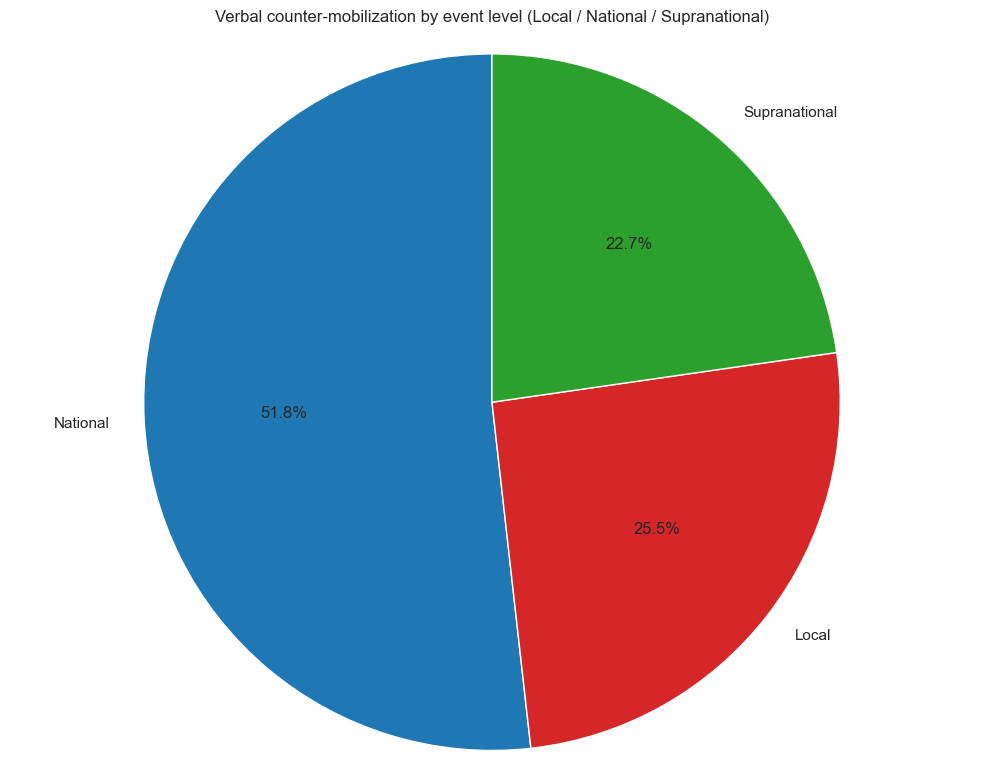

In [53]:
df_h2['is_verbal'] = df_h2['countermob'] == 'Verbal'

# Grouping and computing proportion and counts
table_h2 = df_h2.groupby('level_simple')['is_verbal'].agg(['mean','count']).rename(columns={'mean':'prop_verbal','count':'n'})
table_h2 = table_h2.sort_values('prop_verbal', ascending=False)

# Displaying the table
print(table_h2)

# Plotting
table_plot = table_h2.reset_index().sort_values('prop_verbal', ascending=False)
plt.figure(figsize=(10,8))
plt.pie(table_plot['prop_verbal'],      
        labels=table_plot['level_simple'], 
        autopct='%1.1f%%',                   
        startangle=90,                     
        colors=['#1f77b4', '#d62728', '#2ca02c'])
plt.title('Verbal counter-mobilization by event level (Local / National / Supranational)')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### Conclusion
- Partially supported.
National events clearly attract more verbal counter-mobilization.
- Supranational events, however, do not show a higher verbal response in this sample, possibly because there are fewer supranational events.

##### 3. Protest forms involving physical violence are more likely when counter-mobilization is “Contentious” compared to “No counter-mobilization".

In [54]:
violent_keywords = ['Physical','Violent','Arson','destruction','destruct','Limited destruction','severe']
prot = df_clean[['protform','countermob']].copy()
prot['is_violent'] = prot['protform'].fillna('').apply(lambda x: any(kw.lower() in str(x).lower() for kw in violent_keywords))

In [55]:

prot_group = prot[prot['countermob'].isin(['Contentious','No counter-mobilization'])].copy()
tab = prot_group.groupby('countermob')['is_violent'].agg(['sum','count']).rename(columns={'sum':'n_violent','count':'n_total'})
tab['prop_violent'] = tab['n_violent'] / tab['n_total']
tab

,n_violent,n_total,prop_violent
countermob,,,
Contentious,285,904,0.315265
No counter-mobilization,213,1252,0.170128


##### Visualising the share of violent protest forms by counter-mobilization type

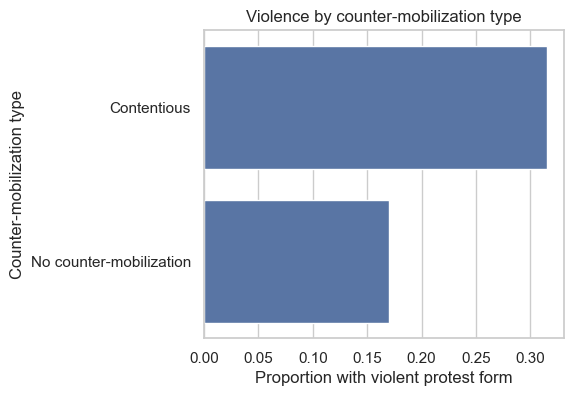

In [56]:
prot_group = prot[prot['countermob'].isin(['Contentious','No counter-mobilization'])].copy()
tab = prot_group.groupby('countermob')['is_violent'].agg(['sum','count']).rename(columns={'sum':'n_violent','count':'n_total'})
tab['prop_violent'] = tab['n_violent'] / tab['n_total']
tab

plot_df3 = tab.reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='prop_violent', y='countermob', data=plot_df3)
plt.xlabel('Proportion with violent protest form')
plt.ylabel('Counter-mobilization type')
plt.title('Violence by counter-mobilization type')
plt.subplots_adjust(left=0.3)
plt.show()

##### Conclusion
- Events marked as **Contentious** have a much **higher share of violent protest forms**.
- This supports the idea that conflictual interactions often coincide with more intense or physical forms of protest.

##### 4. Issues related to Islam, immigration, and identity have become pillars of far-right discourse, especially since 2014?


         Period  related_issue
0  2014 & After      54.702194
1   Before 2014      38.051690
         Period      Islam  Immigration   Identity
0  2014 & After  16.888715    28.095611  22.492163
1   Before 2014  11.292247    13.439364  17.852883


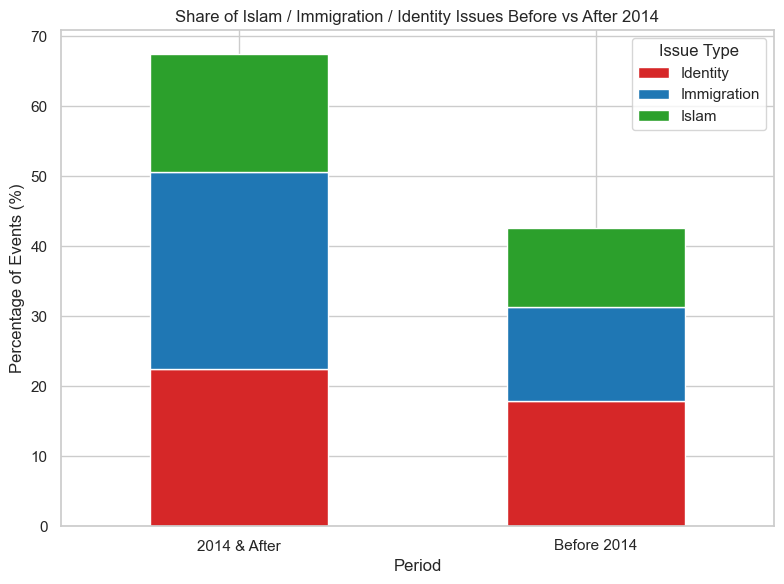

In [57]:
df_h4 = df[['Year', 'Issue1_string', 'Issue2_string', 'Issue3_string']].copy()

keywords = ['Islam', 'Immigration', 'Identity']

# Function to check if any of the issue columns contain these topics
def related_issue(row):
    text = ' '.join(str(x).lower() for x in row if pd.notnull(x))
    return any(k.lower() in text for k in keywords)

# Applying the function to each row
df_h4['related_issue'] = df_h4.apply(related_issue, axis=1)

# Creating two periods: before 2014 and 2014 & after
df_h4['Period'] = df_h4['Year'].apply(lambda y: 'Before 2014' if y < 2014 else '2014 & After')

# Counting percentage of these issues in each period
table_h4 = df_h4.groupby('Period')['related_issue'].mean().reset_index()
table_h4['related_issue'] = table_h4['related_issue'] * 100  # converting to %

print(table_h4)

# Plotting the comparison
def check_individual_issues(row):
    text = ' '.join(str(x).lower() for x in row if pd.notnull(x))
    results = {}
    for keyword in keywords:
        results[keyword] = keyword.lower() in text
    return pd.Series(results)

df_h4[['Islam', 'Immigration', 'Identity']] = df_h4.apply(check_individual_issues, axis=1)

def assign_period(year):
    if year < 2014:
        return 'Before 2014'
    else:
        return '2014 & After'

df_h4['Period'] = df_h4['Year'].apply(assign_period)

table_h4 = df_h4.groupby('Period')[['Islam', 'Immigration', 'Identity']].mean().reset_index()
table_h4[['Islam', 'Immigration', 'Identity']] = table_h4[['Islam', 'Immigration', 'Identity']] * 100

print(table_h4)

table_h4_melted = table_h4.melt(id_vars='Period', value_vars=['Islam', 'Immigration', 'Identity'], var_name='Issue_Type', value_name='Percentage')

table_h4_pivot = table_h4_melted.pivot(index='Period', columns='Issue_Type', values='Percentage')


table_h4_pivot.plot(kind='bar', stacked=True, color=["#d62728", "#1f77b4", "#2ca02c"], figsize=(8,6))
plt.title('Share of Islam / Immigration / Identity Issues Before vs After 2014')
plt.ylabel('Percentage of Events (%)')
plt.xlabel('Period')
plt.legend(title='Issue Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




##### Conclusion

- After 2014, 54.7% the far-right mobilizations focused on these identity-related issues are higher, compared to 38% before.
- Hypothesis 4 is supported.
- This means these topics became much more central after 2014.

##### 5. Geographical density: the majority of the far-right protests are concentrated in fewer countries?

In [58]:
df_h5 = df[['Country_string']].copy().dropna()

# Counting how many events per country
country_counts = df_h5['Country_string'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

print(country_counts.head(10))

    Country  Count
0     Italy   1718
1    Greece    614
2   Germany    455
3    Poland    453
4    France    414
5    Sweden    339
6  Bulgaria    263
7  Slovakia    226
8        UK    201
9   Hungary    201


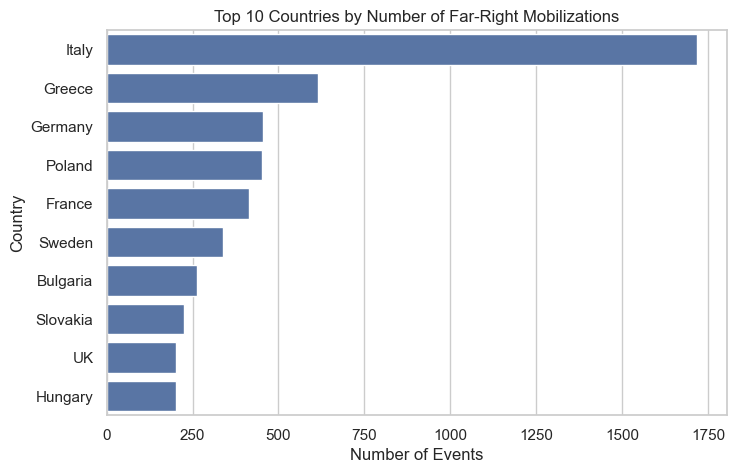

Top 5 countries represent about 72.1% of all mobilizations.


In [59]:
# Plotting top 5 countries
plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Country', data=country_counts.head(10))
plt.title('Top 10 Countries by Number of Far-Right Mobilizations')
plt.xlabel('Number of Events')
plt.ylabel('Country')
plt.show()

top10_share = country_counts.head(5)['Count'].sum() / country_counts['Count'].sum() * 100
print(f"Top 5 countries represent about {top10_share:.1f}% of all mobilizations.")

##### Conclusion

- Only 5 countries i.e. Italy, Greece, Germany, Poland, and France — account for over 70% of all events.
- Hypothesis 5 is strongly supported.

##### 6. Except in specific moments of crisis (for example, between 2012 and 2014), welfare issues do not occupy a central place on the far right's mobilisation agenda

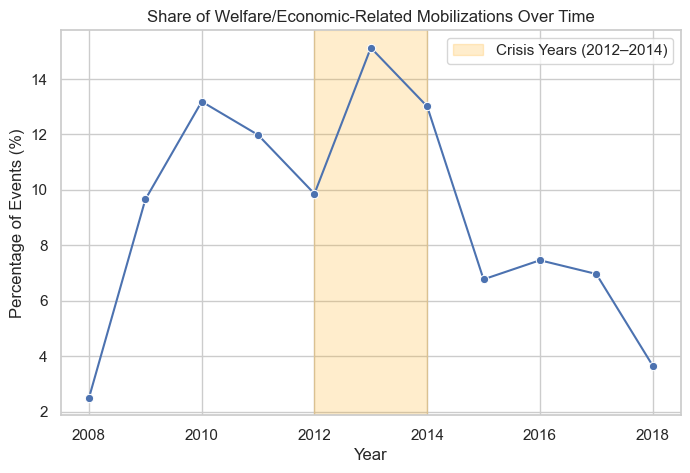

Highest welfare issue share in 2013: 15.1% of events.


In [60]:
#Hypothesis 6
df_h6 = df[['Year', 'Issue1_string', 'Issue2_string', 'Issue3_string']].copy().dropna(how='all')

# Defining welfare keywords
welfare_keywords = ['welfare', 'economic', 'inequality', 'poverty', 'employment', 'austerity']

# Checking if any issue column mentions these
def welfare_issue(row):
    text = ' '.join(str(x).lower() for x in row if pd.notnull(x))
    return any(k in text for k in welfare_keywords)

df_h6['is_welfare'] = df_h6.apply(welfare_issue, axis=1)

# Calculating yearly share of welfare issues
yearly_welfare = df_h6.groupby('Year')['is_welfare'].mean().reset_index()
yearly_welfare['is_welfare'] = yearly_welfare['is_welfare'] * 100  # convert to %

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='is_welfare', data=yearly_welfare, marker='o')
plt.title('Share of Welfare/Economic-Related Mobilizations Over Time')
plt.ylabel('Percentage of Events (%)')
plt.xlabel('Year')
plt.axvspan(2012, 2014, color='orange', alpha=0.2, label='Crisis Years (2012–2014)')
plt.legend()
plt.show()

# Printing the year with the highest welfare focus
peak = yearly_welfare.loc[yearly_welfare['is_welfare'].idxmax()]
print(f"Highest welfare issue share in {int(peak['Year'])}: {peak['is_welfare']:.1f}% of events.")



Highest welfare issue share,in 2013: 15.1% of events.

##### Conclusion

- Only 5 countries i.e. Italy, Greece, Germany, Poland, and France — account for over 70% of all events.
- Hypothesis 5 is strongly supported.
- The line graph shows that around 2012–2014, welfare and economic topics peaked, matching the European economic crisis period. After that, the focus declined.
- Hypothesis 6 is supported.
- Welfare/economic themes were most frequent during the crisis years.